In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']


In [2]:
import os
os.getcwd()

'/home/mmaile/git/IntelligentDriver/analysis'

In [13]:
df = pd.read_csv('../build/data/data.csv', index_col=False)
df.head()

,t,x0,v0,x1,v1,x2,v2,x3,v3,x4,...,x5,v5,x6,v6,x7,v7,x8,v8,x9,v9
0,0.000000,0.000000,10,100.000,10,200.000,10,300.000,10,400.000,...,500.000,10,600.000,10,700.000,10,800.000,10,900.000,10
1,0.033333,0.333333,10,100.333,10,200.333,10,300.333,10,400.333,...,500.333,10,600.333,10,700.333,10,800.333,10,900.333,10
2,0.066667,0.666667,10,100.667,10,200.667,10,300.667,10,400.667,...,500.667,10,600.667,10,700.667,10,800.667,10,900.667,10
3,0.100000,1.000000,10,101.000,10,201.000,10,301.000,10,401.000,...,501.000,10,601.000,10,701.000,10,801.000,10,901.000,10
4,0.133333,1.333330,10,101.333,10,201.333,10,301.333,10,401.333,...,501.333,10,601.333,10,701.333,10,801.333,10,901.333,10


In [14]:
x0 = df['x0']
t = df['t']

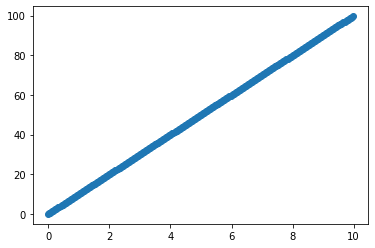

In [32]:
plt.scatter(t, x0)

In [22]:
len(t)

300

<class 'matplotlib.lines.Line2D'>


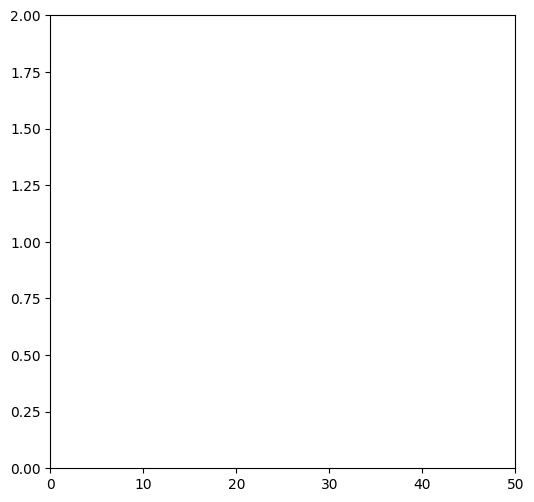

In [47]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, 50))
ax.set_ylim((0, 2))
scat = ax.scatter([], [])

print(type(line))
# initialization function: plot the background of each frame
def init():
    scat.set_offsets([0,0])
    return (scat,)

# animation function. This is called sequentially
def animate(i):
    x = x0[i]
    y = 1
    
    scat.set_offsets((x0[i],1))
    return (scat,)


# call the animator. blit=True means only re-draw the parts that have changed so that the animations display much more quickly.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=30, blit=True)


anim.save('animation.mp4', writer = 'ffmpeg')

/tmp/ipykernel_9105/3206825577.py:8: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  particles=np.zeros(n,dtype=[("position", float , 2),


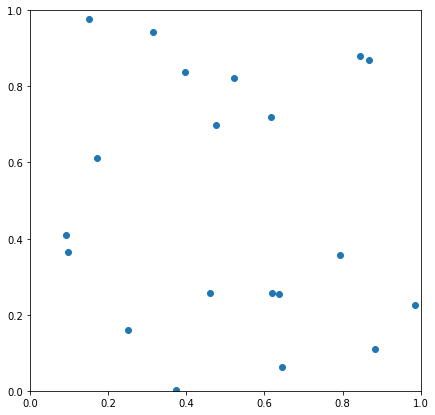

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

dt = 0.005
n=20
L = 1
particles=np.zeros(n,dtype=[("position", float , 2),
                           ("velocity", float ,2),
                           ("force", float ,2),
                           ("size", float , 1)])

particles["position"]=np.random.uniform(0,L,(n,2));
particles["velocity"]=np.zeros((n,2));
particles["size"]=0.5*np.ones(n);

fig = plt.figure(figsize=(7,7))
ax = plt.axes(xlim=(0,L),ylim=(0,L))
scatter=ax.scatter(particles["position"][:,0], particles["position"][:,1])

def update(frame_number):
   particles["force"]=np.random.uniform(-2,2.,(n,2));
   particles["velocity"] = particles["velocity"] + particles["force"]*dt
   particles["position"] = particles["position"] + particles["velocity"]*dt

   particles["position"] = particles["position"]%L
   scatter.set_offsets(particles["position"])
   return scatter,

anim = FuncAnimation(fig, update, interval=10)
plt.show()